# AdaBoost (Adaptive Boosting)

AdaBoost (Adaptive Boosting) is a powerful ensemble learning technique that combines multiple weak learners to create a strong classifier. It iteratively adjusts the weights of misclassified examples to focus more on difficult cases, improving performance.

## Steps in AdaBoost

1. **Initialize Weights**:  
   Every sample in the training data is assigned equal weight.  
   - Formula: `w_i = \frac{1}{N}` , where \( N \) is the total number of samples.

2. **Train Weak Learner**:  
   A weak learner, like a decision stump, is trained on the weighted data, and its classification error is calculated.  
   - Formula:  
   ` \epsilon = \sum_{i=1}^{N} w_i \times I(y_i \neq h(x_i)) `,  
   where \( I \) is the indicator function (1 for misclassified samples, 0 otherwise).

3. **Calculate Weak Learner's Weight**:  
   The weight (alpha) of the weak learner is calculated based on its error \( \epsilon \).  
   - Formula:  
   ` \alpha = \frac{1}{2} \ln \left(\frac{1 - \epsilon}{\epsilon}\right) `.

4. **Update Weights**:  
   Increase the weights of misclassified samples, so that the next learner focuses on them.  
   - Formula:  
   ` w_i = w_i \times \exp(\alpha \times I(y_i \neq h(x_i))) `.  
   Normalize weights to ensure the sum is 1.

5. **Train Next Learner**:  
   Repeat steps 2 to 4 for the next weak learner, which now focuses on the updated weights.

6. **Final Prediction**:  
   Combine the weak learners using a weighted vote to make the final prediction.  
   - Formula:  
   ` H(x) = \text{sign} \left( \sum_{m=1}^{M} \alpha_m h_m(x) \right) `,  
   where \( \alpha_m \) is the weight of the \( m \)-th weak learner, and \( h_m(x) \) is the prediction of the \( m \)-th weak learner.

## Example

Let's assume a binary classification problem with 3 data points, initialized with equal weights:

1. A weak learner misclassifies one data point, yielding an error \( \epsilon \).
2. The weak learner's weight is calculated using the error.
3. The sample weights are updated, assigning higher weight to the misclassified point.
4. The next weak learner focuses on the misclassified point.
5. This process continues, and in the end, all learners are combined for the final prediction.

## Real-World Applications

- **Face Detection**: AdaBoost is used in the Viola-Jones algorithm for detecting faces in images.
- **Fraud Detection**: Helps identify fraudulent transactions.
- **Customer Churn Prediction**: Classifies customers likely to churn based on historical data.

## Pros

- Can **improve accuracy** by focusing on difficult cases.
- Works well with **imbalanced data**.
- **No parameter tuning** for weak learners.

## Cons

- **Sensitive to noisy data** as it focuses too much on misclassified points.
- Computationally **intensive for large datasets**.
---


## **Adaboost Mathemeatical Implementation**

In [2]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [3]:
df = pd.DataFrame()

In [4]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [5]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

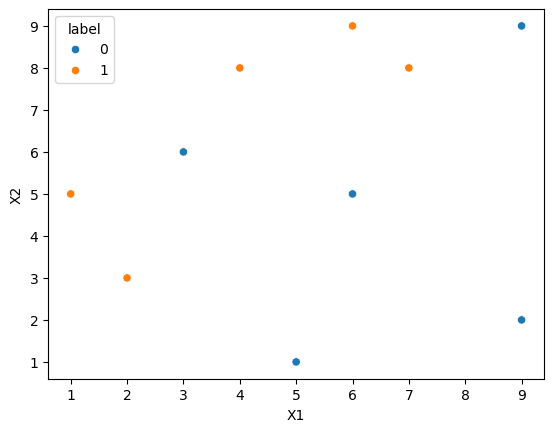

In [6]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [8]:
df.shape

(10, 4)

In [9]:
df['weights'] = 1/df.shape[0]

In [10]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [13]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [14]:
# Step 2 - Train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

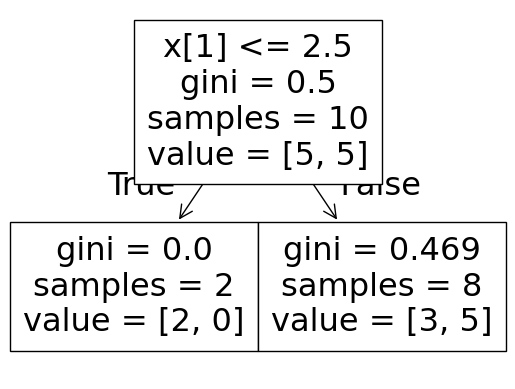

In [15]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

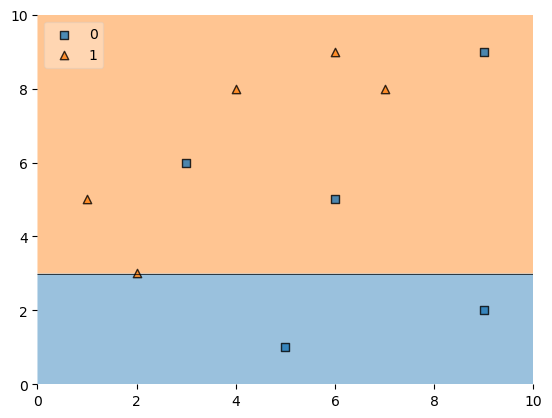

In [16]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [17]:
df['y_pred'] = dt1.predict(X)

In [18]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [19]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

In [20]:
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [21]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [22]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [23]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [24]:
df['updated_weights'].sum()

0.9165153319682015

In [25]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [26]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [27]:
df['nomalized_weights'].sum()

1.0

In [28]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [29]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [30]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [31]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [32]:
index_values = create_new_dataset(df)

index_values

[7, 3, 0, 1, 8, 0, 6, 8, 8, 2]

In [33]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [34]:
second_df

,X1,X2,label,weights
7,7,8,1,0.1
3,4,8,1,0.1
0,1,5,1,0.1
1,2,3,1,0.1
8,9,9,0,0.1
0,1,5,1,0.1
6,6,5,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1


In [35]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [36]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [37]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 8.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.625, 0.5, '  False')]

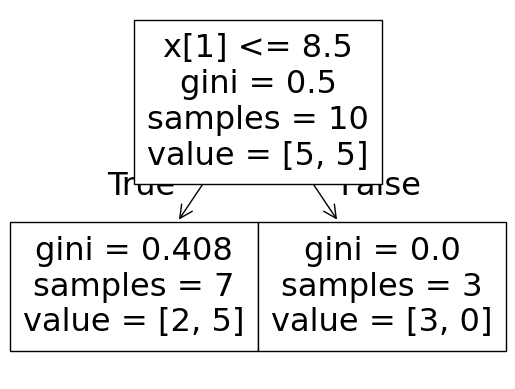

In [38]:
plot_tree(dt2)

<Axes: >

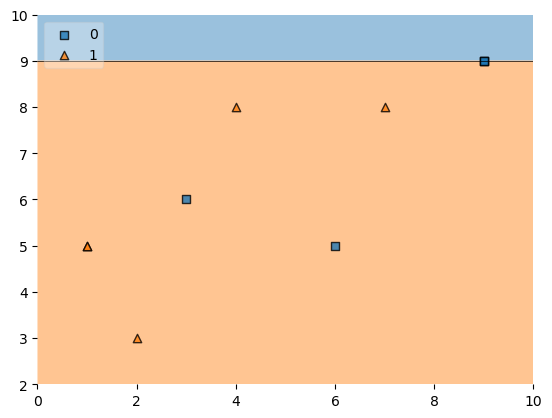

In [39]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [40]:
second_df['y_pred'] = dt2.predict(X)

In [41]:
second_df

,X1,X2,label,weights,y_pred
7,7,8,1,0.1,1
3,4,8,1,0.1,1
0,1,5,1,0.1,1
1,2,3,1,0.1,1
8,9,9,0,0.1,0
0,1,5,1,0.1,1
6,6,5,0,0.1,1
8,9,9,0,0.1,0
8,9,9,0,0.1,0
2,3,6,0,0.1,1


In [42]:
alpha2 = calculate_model_weight(0.1)

In [43]:
alpha2

1.0986122886681098

In [44]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [45]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [46]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
7,7,8,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622
0,1,5,1,0.1,1,0.033622
1,2,3,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
0,1,5,1,0.1,1,0.033622
6,6,5,0,0.1,1,0.297427
8,9,9,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622
2,3,6,0,0.1,1,0.297427


In [47]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [48]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
7,7,8,1,0.1,1,0.033622,0.038922
3,4,8,1,0.1,1,0.033622,0.038922
0,1,5,1,0.1,1,0.033622,0.038922
1,2,3,1,0.1,1,0.033622,0.038922
8,9,9,0,0.1,0,0.033622,0.038922
0,1,5,1,0.1,1,0.033622,0.038922
6,6,5,0,0.1,1,0.297427,0.344313
8,9,9,0,0.1,0,0.033622,0.038922
8,9,9,0,0.1,0,0.033622,0.038922
2,3,6,0,0.1,1,0.297427,0.344313


In [49]:
second_df['nomalized_weights'].sum()

0.9999999999999999

In [50]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [51]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [52]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
7,7,8,1,0.1,1,0.038922,0.000000,0.038922
3,4,8,1,0.1,1,0.038922,0.038922,0.077843
0,1,5,1,0.1,1,0.038922,0.077843,0.116765
1,2,3,1,0.1,1,0.038922,0.116765,0.155687
8,9,9,0,0.1,0,0.038922,0.155687,0.194608
0,1,5,1,0.1,1,0.038922,0.194608,0.233530
6,6,5,0,0.1,1,0.344313,0.233530,0.577843
8,9,9,0,0.1,0,0.038922,0.577843,0.616765
8,9,9,0,0.1,0,0.038922,0.616765,0.655687
2,3,6,0,0.1,1,0.344313,0.655687,1.000000


In [53]:
index_values = create_new_dataset(second_df)

In [54]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [55]:
third_df

,X1,X2,label,weights
1,2,3,1,0.1
6,6,5,0,0.1
6,6,5,0,0.1
3,4,8,1,0.1
7,7,8,1,0.1
3,4,8,1,0.1
7,7,8,1,0.1
0,1,5,1,0.1
6,6,5,0,0.1
1,2,3,1,0.1


In [56]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

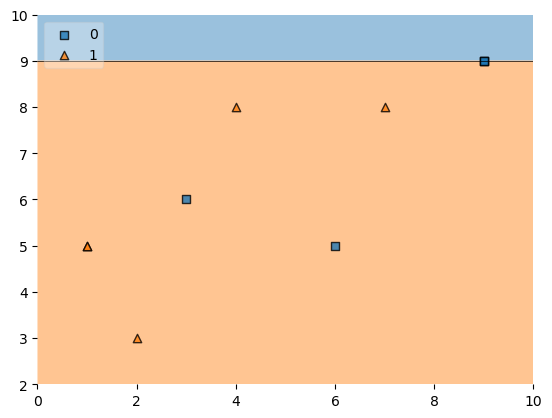

In [57]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [58]:
third_df['y_pred'] = dt3.predict(X)

In [59]:
third_df

,X1,X2,label,weights,y_pred
1,2,3,1,0.1,1
6,6,5,0,0.1,1
6,6,5,0,0.1,1
3,4,8,1,0.1,1
7,7,8,1,0.1,0
3,4,8,1,0.1,1
7,7,8,1,0.1,1
0,1,5,1,0.1,0
6,6,5,0,0.1,0
1,2,3,1,0.1,1


In [60]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [61]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


### Prediction

In [62]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [63]:
dt2.predict(query)

array([1])

In [64]:
dt3.predict(query)

array([1])

In [65]:
alpha1*1 + alpha2*(1) + alpha3*(1)

1.09861228866811

In [66]:
np.sign(1.09)

1.0

In [67]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1])

In [68]:
dt2.predict(query)

array([0])

In [69]:
dt3.predict(query)

array([0])

In [70]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

-0.2513144282809062

In [71]:
np.sign(-0.25)

-1.0